In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [4]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 51s 53ms/step - loss: 0.1746 - accuracy: 0.9480 - val_loss: 0.0546 - val_accuracy: 0.9819
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0364 - val_accuracy: 0.9881
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0306 - val_accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0291 - val_accuracy: 0.9899
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0309 - val_accuracy: 0.9895


In [8]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 3s 8ms/step - loss: 0.0309 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


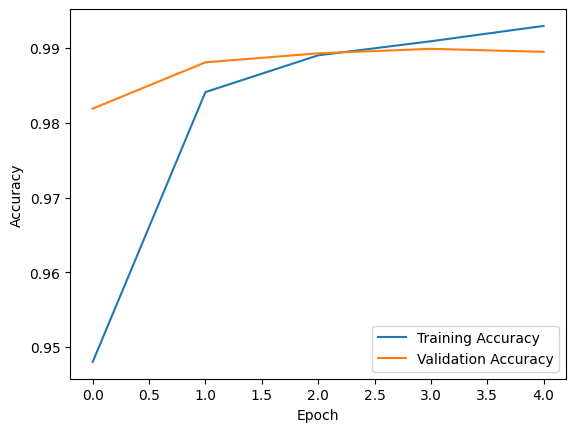

In [9]:

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()